In [1]:
import pandas as pd
import numpy as np


In [16]:

# Load the metrics tsv file where the first line is the header
df = pd.read_csv('C:/Users/aslak/Master/Github_first/Master/data/salmon/combined_performance_metrics.tsv', sep='\t', header=0)
#df = pd.read_csv('C:/Users/aslak/Master/Github_first/Master/data/salmon/combined_performance_metrics.tsv', sep='\t', header=None)


C:\Users\aslak\AppData\Local\Temp\ipykernel_6024\4241823572.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('C:/Users/aslak/Master/Github_first/Master/data/salmon/combined_performance_metrics.tsv', sep='\t, header=0')


In [3]:
# print the first row
#print(df.head(1))


# Remove "AS-TAC-peaks/AtlanticSalmon_ATAC_" and ".mLb.clN_peaks.narrowPeak" from the column names
df.columns = df.columns.str.replace('AS-TAC-peaks/AtlanticSalmon_ATAC_', '')
df.columns = df.columns.str.replace('.mLb.clN_peaks.narrowPeak', '')

#print the column names
print(df.columns)
df.shape

Index(['num_cnns', 'metric',
       'Brain_Immature_Female_R1 Brain_Immature_Female_R2 Brain_Immature_Female_R3 Brain_Immature_Male_R1 Brain_Immature_Male_R2 Brain_Immature_Male_R3 Brain_Mature_Female_R1 Brain_Mature_Female_R2 Brain_Mature_Female_R3 Brain_Mature_Male_R1 Brain_Mature_Male_R2 Brain_Mature_Male_R3 EarlySomitogenesis_R1 EarlySomitogenesis_R2 EarlySomitogenesis_R3 Gonad_Immature_Female_R1 Gonad_Immature_Female_R2 Gonad_Immature_Female_R3 Gonad_Immature_Male_R1 Gonad_Immature_Male_R2 Gonad_Immature_Male_R3 Gonad_Mature_Female_R1 Gonad_Mature_Female_R2 Gonad_Mature_Female_R3 Gonad_Mature_Male_R1 Gonad_Mature_Male_R2 Gonad_Mature_Male_R3 LateBlastulation_R1 LateBlastulation_R2 LateBlastulation_R3 LateSomitogenesis_R1 LateSomitogenesis_R2 LateSomitogenesis_R3 Liver_Immature_Female_R1 Liver_Immature_Female_R2 Liver_Immature_Female_R3 Liver_Immature_Male_R1 Liver_Immature_Male_R2 Liver_Immature_Male_R3 Liver_Mature_Female_R1 Liver_Mature_Female_R2 Liver_Mature_Female_R3 Liver_Mat

(100, 3)

In [4]:
# sort rows to num_cnns
df = df.sort_values(by='num_cnns')

# Melt the DataFrame
df_melted = pd.melt(df, id_vars=['num_cnns', 'metric'])

# Now each row represents a single observation
# The tissue type is stored in the 'variable' column and the corresponding value is stored in the 'value' column

# If you want to pivot the table such that the only columns are the different values for num_cnns and metrics
pivot_df = df_melted.pivot_table(index='variable', columns=['num_cnns', 'metric'], values='value').reset_index()

In [5]:
# pivot the table so that the columns are the samples and the rows are the metrics
#write df_T to a .tsv file
pivot_df.to_csv('C:/Users/aslak/Master/Github_first/Master/data/salmon/combined_performance_metrics_pivoted.tsv', sep='\t', index=True)

ValueError: Could not interpret value `threshold` for `x`. An entry with this name does not appear in `data`.

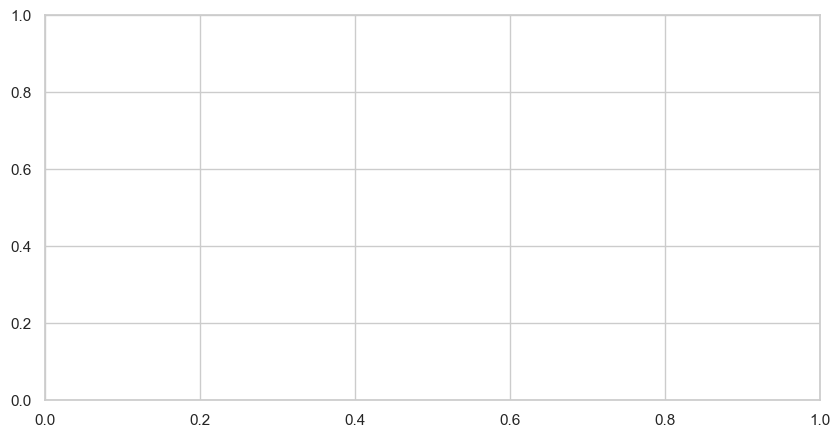

In [17]:
# make a line plot of the data, aucroc and aucpr with different colors
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df, x='threshold', y='aucroc', label='aucroc')
sns.lineplot(data=df, x='threshold', y='aucpr', label='aucpr')
plt.xlabel('Threshold')
plt.ylabel('Performance')
plt.title('Performance of the model')
plt.show()



In [63]:

# count the number of sequences containing at least one 'N'
count_N = df[1].str.contains('A').sum()

# count the number of sequences not of length 1000
count_not_1000 = (df[1].str.len() < 1000).sum()
good_lines = (df[1].str.len() == 1000) & (~df[1].str.contains('N'))
print(f"Number of sequences that contain at least one 'N': {count_N}")
print(f"Number of sequences that are not of length 1000: {count_not_1000}")
print(f"Number of sequences that are good: {good_lines.sum()}")
print(f"Fraction of sequences that are good: {good_lines.sum()/df.shape[0]}")



Number of sequences that contain at least one 'N': 1638603
Number of sequences that are not of length 1000: 0
Number of sequences that are good: 1638680
Fraction of sequences that are good: 1.0


In [64]:
#print the sequences that does not contain an 'A'
print(df[1][~df[1].str.contains('A')])

3981       TCTCTGTCTGTCTCGCTCTCTGTCTGTCTGTCTCGCTCTCTGTCTG...
286411     TCTCTCTCTCTGTGTCTCTCTCTCTCTGTGTCTCTGTGTGTGTCTC...
747627     CTGTCTCTGTTTCTCTGTCTGTCTCTGTCTGTCTCTGTTTCTCTGT...
1525743    TCGCTCTGCGTGTGGCGCTCTCTCGCTCTGCGTGTGGCGCTCTCGC...
1525744    CTCTGCGTGCGTGTGGCGCTCTCTCTCTCGCTCTGCGTGCGTGTGG...
                                 ...                        
1627339    TGTGTGTGTGTGTGTGTGTGTGTGTTGTCGGTGTGTGTGTGTGTGT...
1627340    GTGTGTGTGTTGTCGGTGTGTGTGTGTGTGTGTGTTGTCGGTGTGT...
1627341    GGTGTGTGTGTGTGTGTGTGTTGTCGGTGTGTGTGTGTGTGTGTTG...
1631206    TCTCTCTCTGTGTCTCTCTCTCTCTCTGTGTGTCTCTCTCTCTGTC...
1631231    CTCTCTGTGTGTGTGTGTGTCTGTCTGTCTCTCTCTCTGTGTGTGT...
Name: 1, Length: 77, dtype: object


In [1]:
content = []
with open('C:/Users/aslak/Master/Github_first/SCRATCH/AS-TAC/AS-TAC_1000bp.tsv')as f:
    for line in f:
        content.append(line.strip().split())

In [47]:
num_rows = len(content)
num_cols = len(content[0]) if content else 0

print(f"The shape of the content list is ({num_rows}, {num_cols})")

The shape of the content list is (1638916, 65)


In [48]:
num_lines = 0
count_N = 0
count_not_1000 = 0
good_lines = 0
for line_content in content:
    sequence = line_content[0][1]
    if 'N' in sequence:
        count_N += 1
    if len(sequence) != 1000:
        count_not_1000 += 1
    if 'N' not in sequence and len(sequence) == 1000:
        good_lines +=1

print(f"Number of sequences that contain at least one 'N': {count_N}")
print(f"Number of sequences that are not of length 1000: {count_not_1000}")
print(f"Number of sequences: {num_lines}")

Number of sequences that contain at least one 'N': 0
Number of sequences that are not of length 1000: 1638916
Number of sequences: 0


In [46]:
print(good_lines)

0
